# Hydration Model

By Gail Romer and Maia Materman


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Code from previous chapters

`make_system`, `plot_results`, and `calc_total_infected` are unchanged.

In [2]:
def make_system(ka, k12, k21, kel):
    """Make a system object for the water model.
    
    ka (per minute)
    k12 (per minute)
    k21 (per minute)
    kel (per minute)
    
    returns: System object
    """
    init = State(V_1 = 18.5, V_2 = 31.6)   # V_1 = Compartment 1, V_2 = Compartment 2
                                        

    t0 = 0 # time has yet to begin
    dt = 1 # minutes
    t_end = 3 * 60 # 3 hours
    

    return System(init=init, t0=t0, t_end=t_end,
                  ka=ka, k12=k12, k21=k21, kel=kel, dt=dt)


make_system(0.0715,       #ka per minute
            0.0384,        #k12 per minute
            0.0223,     #k21 per minute
            0.241         #kel per minute
           )

,values
init,V_1 18.5 V_2 31.6 dtype: float64
t0,0
t_end,180
ka,0.0715
k12,0.0384
k21,0.0223
kel,0.241
dt,1


In [3]:
def plot_results(V_1, V_2):
    """Plot the results of water model.
    
    V_1: TimeSeries
    V_2: TimeSeries
    
    """
    
    

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
#     i = t0
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system)
#         i = i + 1
        
    return frame

In [7]:
# Original

def update_func(state, dt, system):
    """Update the water model.
    
    state: State (V_1, V_2)
    t: time
    system: System object
    
    returns: State (V_1, V_2)
    """
    
    unpack(system)
    v_1, v_2 = state
    
    kel_1 = (v_1/(v_1+v_2)) * kel
    kel_2 = (v_2/(v_1+v_2)) * kel
    
    dv1dt = ka + k21 - k12 - kel_1
    dv2dt = k12 - k21 - kel_2
    
    v_1 += dv1dt * dt
    v_2 += dv2dt * dt
    
    return State(V_1 = v_1, V_2 = v_2)

In [8]:
system = make_system(0.0715,       #ka per minute
            0.0384,        #k12 per minute
            0.0223,     #k21 per minute
            0.241         #kel per minute
           )
            
results =run_simulation(system, update_func)

,V_1,V_2
0,18.500000,31.600000
1,18.466408,31.464092
2,18.432676,31.328324
3,18.398804,31.192696
4,18.364791,31.057209
5,18.330638,30.921862
6,18.296343,30.786657
7,18.261907,30.651593
8,18.227329,30.516671
9,18.192610,30.381890


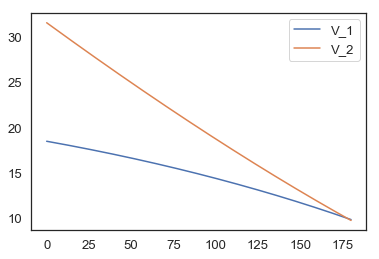

In [9]:
results.plot()

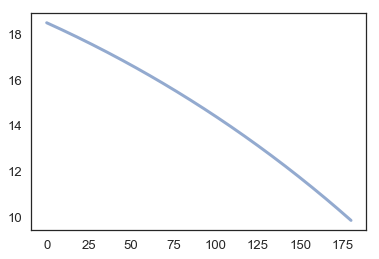

In [11]:
plot(results.V_1)

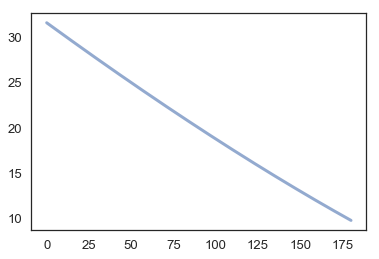

In [12]:
plot(results.V_2)